<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 📊 Exploratory Data Analysis (EDA)

### ✅ Principales insights:

- **25.29%** de los comercios tienen presencia web.
- **Tandil** y **Olavarria** lideran en digitalización.
- **Instagram 19.2%** y **Facebook 18.11** concentran la presencia en RRSS
- Los comercios con sitio web tienen **mayor cantidad de reviews** en todas las ciudades.
- El puntaje promedio se mantiene **alto y constante (4.0 - 4.4)**.
- Categorías más comunes:
  - 
  - 
  - 
  - 

---

</div>

In [1]:
# Se importan las librerias necesarias para la manipulación y visualización de datos.
import pandas as pd
import os
import numpy as np
from glob import glob
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Configura pandas para mostrar todas las columnas del DataFrame al mostrarlo, sin recorte visual.
pd.set_option('display.max_columns', None) 

In [2]:
# Carga de datos desde archivo CSV
df = pd.read_csv('../CleanData/Regional.csv')

In [3]:
# Obtenemos número de filas y columnas del DataFrame
df.shape

(5859, 16)

In [4]:
# Obtenemos el número de elementos en el DataFrame
df.size

93744

In [5]:
# Información del DataFrame: 
# Número de filas y columnas, nombres y tipos de datos de las columnas,
# valores no nulos en cada columna, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5859 non-null   object 
 1   categoryName  5859 non-null   object 
 2   website       5859 non-null   object 
 3   street        5859 non-null   object 
 4   phone         5859 non-null   object 
 5   city          5859 non-null   object 
 6   state         5859 non-null   object 
 7   location/lat  5859 non-null   float64
 8   location/lng  5859 non-null   float64
 9   totalScore    5859 non-null   float64
 10  rank          5859 non-null   int64  
 11  imageUrl      5859 non-null   object 
 12  imagesCount   5859 non-null   float64
 13  reviewsCount  5859 non-null   int64  
 14  scrapedAt     5859 non-null   object 
 15  searchString  5859 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 732.5+ KB


In [6]:
# Análisis de tipos de datos para identificar variables numéricas y categóricas
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

In [7]:
# Convertir fecha de scraping manteniendo formato datetime
# Esto permite análisis temporales futuros (ej: comparar con scraping en 6 meses)
df['scrapedAt'] = pd.to_datetime(
    df['scrapedAt'], 
    errors='coerce',  # Maneja fechas inválidas sin romper el código
    utc=True          # Estandariza zona horaria para comparaciones
).dt.floor('s').dt.tz_localize(None)  # Elimina timezone para visualización limpia
df['scrapedAt']

0      2025-06-15 22:56:55
1      2025-06-15 22:56:54
2      2025-06-15 22:56:57
3      2025-06-15 22:56:57
4      2025-06-15 22:56:58
               ...        
5854   2025-07-30 15:45:05
5855   2025-07-30 15:45:19
5856   2025-07-30 15:45:19
5857   2025-07-30 15:45:06
5858   2025-07-30 15:45:04
Name: scrapedAt, Length: 5859, dtype: datetime64[ns]

In [8]:
# # Visualizar las primeras 10 filas para entender la estructura
df.head(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,Dti - Azul,Soporte Y Servicios Informáticos,Incomplete,Av. Juan Domingo Perón 525,+54 9 2281 42-7066,Azul,Provincia de Buenos Aires,-36.782006,-59.865497,0.0,22,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15 22:56:55,Tecnologia
1,Tecno Computacion,Tienda De Móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 9 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15 22:56:54,Tecnologia
2,Ingeniero Marcelo Edgardo Cornec,Ingeniero,Incomplete,Av. Juan Domingo Perón 622,+54 9 2281 42-6984,Azul,Provincia de Buenos Aires,-36.783278,-59.863594,5.0,20,https://lh3.googleusercontent.com/p/AF1QipN3mw...,13.0,3,2025-06-15 22:56:57,Comercio
3,La Esquina,Kiosco,Incomplete,"7300, Gral. Paz 1500",+54 9 2281 36-0736,Azul,Provincia de Buenos Aires,-36.798090,-59.853525,3.7,19,https://lh3.googleusercontent.com/p/AF1QipP1o8...,1.0,3,2025-06-15 22:56:57,Comercio
4,Vidrieria 25 De Mayo De Jose Canalicchio,Comercio,Incomplete,Guaminí 610,+54 9 2281 53-7036,Azul,Provincia de Buenos Aires,-36.785552,-59.867145,4.2,40,https://lh3.googleusercontent.com/p/AF1QipM1o-...,5.0,9,2025-06-15 22:56:58,Comercio
5,El Almacén,Tienda De Ropa,Incomplete,Av. Mitre 901,+54 9 2281 43-6001,Azul,Provincia de Buenos Aires,-36.782064,-59.853528,4.1,37,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,15,2025-06-15 22:56:58,Comercio
6,Tus Sorrentinos,Comercio,Incomplete,España 418,+54 9 2281 56-4122,Azul,Provincia de Buenos Aires,-36.779354,-59.853713,0.0,36,https://lh3.googleusercontent.com/p/AF1QipPp_b...,22.0,0,2025-06-15 22:56:58,Comercio
7,Venden Y Permutas,Tienda General,Incomplete,Gral. Rivas 787,Incomplete,Azul,Provincia de Buenos Aires,-36.788767,-59.865031,0.0,34,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15 22:56:58,Comercio
8,Minimercado La Esquina De Alejandro Y Silvina,Comercio,Incomplete,España 1699,Incomplete,Azul,Provincia de Buenos Aires,-36.796488,-59.873790,4.3,29,https://lh3.googleusercontent.com/gps-cs-s/AC9...,20.0,22,2025-06-15 22:56:58,Comercio
9,Kiosco Pasaje Del Parque,Comercio,Incomplete,Pje. 25 de Abril,+54 9 2281 52-6194,Azul,Provincia de Buenos Aires,-36.781831,-59.875032,5.0,23,https://lh3.googleusercontent.com/gps-cs-s/AC9...,6.0,1,2025-06-15 22:56:58,Comercio


In [9]:
# Visualización de las últimas filas del DataFrame
df.tail(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5849,Mundo Peugeot - Repuestos Y Accesorios,Tienda De Repuestos Para Automóviles,Incomplete,Gral. Rodríguez 1655,+54 9 249 402-4966,Tandil,Provincia de Buenos Aires,-37.313746,-59.143988,4.5,75,https://lh3.googleusercontent.com/p/AF1QipPA8V...,11.0,86,2025-07-30 15:45:17,Repuestos
5850,Riders Repuestos,Tienda De Repuestos Para Automóviles,Incomplete,Gral. Rodríguez 1495,Incomplete,Tandil,Provincia de Buenos Aires,-37.316190,-59.142774,0.0,70,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:45:17,Repuestos
5851,Santamarina Repuestos,Tienda De Repuestos Para Automóviles,Incomplete,Av. Santamarina 36,Incomplete,Tandil,Provincia de Buenos Aires,-37.331030,-59.126801,0.0,69,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:45:17,Repuestos
5852,Repuestos Buzon,Tienda De Repuestos Para Automóviles,Incomplete,Av. Balbín 1073,+54 9 249 448-7106,Tandil,Provincia de Buenos Aires,-37.313849,-59.122081,4.9,66,https://lh3.googleusercontent.com/gps-proxy/AL...,2.0,49,2025-07-30 15:45:17,Repuestos
5853,Kain Repuestos Gas Y Agua,Tienda De Artículos Relacionados Con El Gas,Incomplete,Leandro Alem 1217,+54 9 249 425-1165,Tandil,Provincia de Buenos Aires,-37.317811,-59.138120,4.8,68,https://lh3.googleusercontent.com/p/AF1QipNt9j...,65.0,5,2025-07-30 15:45:17,Repuestos
5854,Arkansas Muebles,Tienda De Muebles,http://arkansastandil.mitiendanube.com/,Av. Marconi 1498,+54 9 249 464-3311,Tandil,Provincia de Buenos Aires,-37.317572,-59.125688,5.0,79,https://lh3.googleusercontent.com/gps-proxy/AL...,3.0,1,2025-07-30 15:45:05,Electrodomesticos
5855,Pilchas Mb,Tienda De Ropa De Hombre,Incomplete,San Martín 915,+54 9 223 555-9393,Tandil,Provincia de Buenos Aires,-37.324699,-59.132030,5.0,78,https://lh3.googleusercontent.com/gps-cs-s/AC9...,6.0,9,2025-07-30 15:45:19,Ropa
5856,Rodriggi,Tienda De Ropa De Hombre,Incomplete,9 de Julio 445,+54 9 249 457-5285,Tandil,Provincia de Buenos Aires,-37.327796,-59.133822,4.9,80,https://lh3.googleusercontent.com/p/AF1QipPNSw...,6.0,23,2025-07-30 15:45:19,Ropa
5857,Lg Service,Servicio De Reparación De Electrodomésticos,Incomplete,Saavedra 778,+54 9 249 438-8237,Tandil,Provincia de Buenos Aires,-37.318255,-59.121669,4.7,84,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,3,2025-07-30 15:45:06,Electrodomesticos
5858,Friototal,Distribuidor De Acero,http://www.friototal.com.ar/,Av. del Valle 1258,+54 9 249 469-8239,Tandil,Provincia de Buenos Aires,-37.309298,-59.134556,3.7,60,https://lh3.googleusercontent.com/gps-cs-s/AC9...,17.0,3,2025-07-30 15:45:04,Electrodomesticos


In [10]:
# Muestra aleatoria de 10 filas del DataFrame para una inspección rápida
df.sample(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
2162,Mirame Y Vestite,Tienda De Ropa De Mujer,Incomplete,Rivadavia 3112,+54 9 2284 41-3715,Olavarría,Provincia de Buenos Aires,-36.891813,-60.319644,4.2,83,https://lh3.googleusercontent.com/gps-proxy/AL...,2.0,15,2025-06-11 18:14:10,Tienda
2445,Infracom Coopelectric,Proveedor De Servicios De Internet,http://infracomcoopelectric.com.ar/,Belgrano 2800,+54 9 2284 41-9990,Olavarría,Provincia de Buenos Aires,-36.893397,-60.321542,2.4,9,https://lh3.googleusercontent.com/p/AF1QipNSaB...,14.0,131,2025-06-15 23:33:13,Telefonia
3558,Mixer Electronicos,Tienda De Accesorios Para Móviles,Incomplete,Darragueira 2216,+54 9 249 436-1450,Tandil,Provincia de Buenos Aires,-37.298917,-59.125984,4.2,76,https://lh3.googleusercontent.com/p/AF1QipMPS4...,6.0,6,2025-05-04 16:08:19,Comercio
2871,Cr Automotores,Concesionario De Camiones,http://crautomotorescom.wordpress.com/,Av. del Valle 4467,+54 9 2284 41-9044,Olavarría,Provincia de Buenos Aires,-36.908977,-60.313391,4.8,8,https://lh3.googleusercontent.com/p/AF1QipN70Y...,22.0,15,2025-07-30 14:43:09,Vehiculos
1518,Juarez Cars,Concesionario De Automóviles,Incomplete,Av. Pres. Juan Domingo Perón,Incomplete,Benito Juárez,Provincia de Buenos Aires,-37.679411,-59.799797,0.0,131,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-05-29 00:54:20,Tienda
1222,Panaderia Las Delicias,Panadería,Incomplete,Moreno 570,+54 9 2281 42-2730,Azul,Provincia de Buenos Aires,-36.778248,-59.860583,4.6,41,https://lh3.googleusercontent.com/gps-cs-s/AC9...,15.0,265,2025-07-30 14:54:08,Comercio
4089,Electricidad Sudeste,Tienda De Materiales Para La Construcción,Incomplete,Av. Falucho 1223,Incomplete,Tandil,Provincia de Buenos Aires,-37.320852,-59.106836,0.0,16,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-05-28 23:35:29,Electronica
3442,Taller Mecanico Penedo,Taller De Automóviles,Incomplete,RP30 1400,+54 9 249 434-5802,Rauch,Provincia de Buenos Aires,-36.763515,-59.089012,0.0,30,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,0,2025-07-30 15:10:35,Vehiculos
4379,Alberto Camus,Diseñador De Sitios Web,Incomplete,Incomplete,Incomplete,Tandil,Provincia de Buenos Aires,-37.319523,-59.142702,0.0,19,https://lh3.googleusercontent.com/p/AF1QipNxPr...,18.0,0,2025-05-29 00:15:25,Web
3955,Pintureria Wolpe,Tienda De Pinturas,Incomplete,Incomplete,Incomplete,Tandil,Provincia de Buenos Aires,-37.323336,-59.139980,0.0,90,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-05-04 16:08:52,Comercio


In [11]:
# Contar total de registros por ciudad
t_business = df.groupby('city')['title'].count().sort_values(ascending=False)
t_business
print(f"Total de registros por ciudad:\n{t_business}")

Total de registros por ciudad:
city
Tandil           2409
Olavarría        1494
Azul             1274
Benito Juárez     351
Rauch             331
Name: title, dtype: int64


In [12]:
business = t_business.sum().sum()  # Total regional de comercios
business
print(f"El total regional de comercios es: {business}")

El total regional de comercios es: 5859


In [13]:

# Contar total de registros por ciudad excluyendo 'incomplete'
total_web = (df[~df['website'].str.contains('Incomplete', case=False, na=False)]
            .groupby('city')['website'].count()
            .sort_values(ascending=False))
total_web
print(f"Total de registros por ciudad (excluyendo registros incompletos):\n{total_web}")

Total de registros por ciudad (excluyendo registros incompletos):
city
Tandil           849
Olavarría        497
Azul             282
Benito Juárez     62
Rauch             60
Name: website, dtype: int64


In [14]:
webs = total_web.sum().sum()
print(f"El total regional de registros digitales es: {webs}")

El total regional de registros digitales es: 1750


In [15]:
# Análisis de calidad: datos faltantes agrupados por ciudad
incomplete_city = (df[df['website'] == 'Incomplete']
                .groupby('city')['website'].count()
                .sort_values(ascending=False))
incomplete_city

city
Tandil           1560
Olavarría         997
Azul              992
Benito Juárez     289
Rauch             271
Name: website, dtype: int64

In [16]:
# Crear nuevo DataFrame filtrando registros completos
# Excluye filas que contengan 'incomplete' en cualquiera de las columnas
df_full_records = df[~(df == 'Incomplete').any(axis=1)].copy()
# Resultado: DataFrame con registros que tienen datos completos en todas las columnas
df_full_records.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
1,Tecno Computacion,Tienda De Móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 9 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15 22:56:54,Tecnologia
17,Stilton Almacén,Tienda De Alimentación,http://instagram.com/stiltonalmacen,Moreno 850,+54 9 2281 66-6262,Azul,Provincia de Buenos Aires,-36.781869,-59.864955,4.5,54,https://lh3.googleusercontent.com/p/AF1QipOsq_...,18.0,23,2025-06-15 22:57:00,Comercio
37,Campos Del Centro Srl,Comercio,https://www.instagram.com/camposdelcentrosrl/,C. 61 535,+54 9 2281 50-1288,Azul,Provincia de Buenos Aires,-36.792174,-59.841310,4.4,13,https://lh3.googleusercontent.com/p/AF1QipN00H...,9.0,8,2025-06-15 22:56:57,Comercio
43,Drugstore Center Azul,Kiosco,https://instagram.com/drugstore_center_azul?ig...,Av.Mitre 401 Av 25 de Mayo esq Tandil Av Canev...,+54 9 2281 51-1652,Azul,Provincia de Buenos Aires,-36.778875,-59.861003,4.7,7,https://lh3.googleusercontent.com/p/AF1QipOFa3...,3.0,42,2025-06-15 22:56:57,Comercio
45,Suttò Piedras Y Aromas,Comercio,https://instagram.com/sutto.artesanias?igshid=...,Rauch 959,+54 9 2281 56-7256,Azul,Provincia de Buenos Aires,-36.786314,-59.863274,5.0,5,https://lh3.googleusercontent.com/p/AF1QipO03j...,14.0,94,2025-06-15 22:56:57,Comercio


In [17]:
df_full_records['categoryName'].value_counts()

categoryName
Tienda De Ropa                               105
Agencia Inmobiliaria                          84
Tienda De Materiales Para La Construcción     52
Comercio                                      49
Tienda De Repuestos Para Automóviles          42
                                            ... 
Equipos Para Panaderías                        1
Chatarrería                                    1
Contratista De Materiales Para Suelos          1
Residencia De Ancianos                         1
Contratista                                    1
Name: count, Length: 352, dtype: int64

In [18]:
word = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'region20', 'Incomplete']
# Crear máscara combinada
contains_word = df['website'].str.contains('|'.join(word), case=False, na=False)
# Contar los que NO contienen ninguna de esas palabras
dominio_Propio = (~contains_word).sum()
dominio_Propio
print(f"De los {webs} registros digitales totales, los que tienen dominio propio son {dominio_Propio}")

De los 1750 registros digitales totales, los que tienen dominio propio son 941


In [19]:
# Identifica las plataformas digitales más utilizadas por los negocios
words = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'pedidosya', 'region20']
# Se cuenta cuántos negocios utilizan cada plataforma en sus URLs de website
# El método str.contains() busca cada palabra en la columna 'website' (ignorando mayúsculas/minúsculas)
# Los resultados se ordenan de mayor a menor para identificar las plataformas más populares
result = (pd.Series({word: df['website'].str.contains(word, case=False, na=False).sum() 
                for word in words})
        .sort_values(ascending=False))

result

instagram           336
facebook            317
guia-dorada          68
tiendanube           36
wa.me                15
sites.google.        13
gurugo                8
mercadoshops          8
region20              5
mercadolibre          3
paginasamarillas      2
pedidosya             1
dtype: int64

In [20]:
# 1. Armar la tabla base con las plataformas detectadas
result_df = pd.DataFrame({
    'count': result,
    'percentage': (result / webs * 100).round(2)
})

# 2. Agregar fila de own_Domain
result_df.loc["dominio_Propio"] = [dominio_Propio, round((dominio_Propio / webs) * 100, 2)]

# 3. Reordenar por count descendente (para que own_Domain no quede al final desordenado)
result_df = result_df.sort_values("count", ascending=False)

result_df


,count,percentage
dominio_Propio,941.0,53.77
instagram,336.0,19.20
facebook,317.0,18.11
guia-dorada,68.0,3.89
tiendanube,36.0,2.06
wa.me,15.0,0.86
sites.google.,13.0,0.74
mercadoshops,8.0,0.46
gurugo,8.0,0.46
region20,5.0,0.29


In [21]:
# Diccionario: palabra a buscar
words_dict = {
    'facebook': 'Facebook',
    'instagram': 'Instagram',
    'mercadolibre': 'Mercado Libre',
    'mercadoshops': 'MercadoShops',
    'tiendanube': 'TiendaNube',
    'paginasamarillas': 'Páginas Amarillas',
    'guia-dorada': 'Guía Dorada',
    'gurugo': 'Gurugo',
    'wa.me': 'WhatsApp',
    'sites.google.': 'Google Sites',
    'pedidosya': 'PedidosYa',
    'region20': 'Región20'
}
# Conteo por cada palabra
result = pd.Series({
    label: df['website'].str.contains(word, case=False, na=False).sum()
    for word, label in words_dict.items()
})

# Agregar dominios propios
result["Dominio propio"] = dominio_Propio

# Tabla final con porcentajes
result_df = pd.DataFrame({
    "count": result,
    "percentage": (result / webs * 100).round(2)
}).sort_values("count", ascending=False)
result_df

,count,percentage
Dominio propio,941,53.77
Instagram,336,19.20
Facebook,317,18.11
Guía Dorada,68,3.89
TiendaNube,36,2.06
WhatsApp,15,0.86
Google Sites,13,0.74
Gurugo,8,0.46
MercadoShops,8,0.46
Región20,5,0.29


📋 RESUMEN DEL ANÁLISIS
🔹 Total de categorías: 13
🔹 Categorías mostradas (con cantidades mayores a 10): 7
🔹 Rango de valores mostrados: 13 - 941 negocios
🔹 Categoría líder: Dominio propio (941 negocios)
🔹 Total negocios digitalizados analizados: 1726


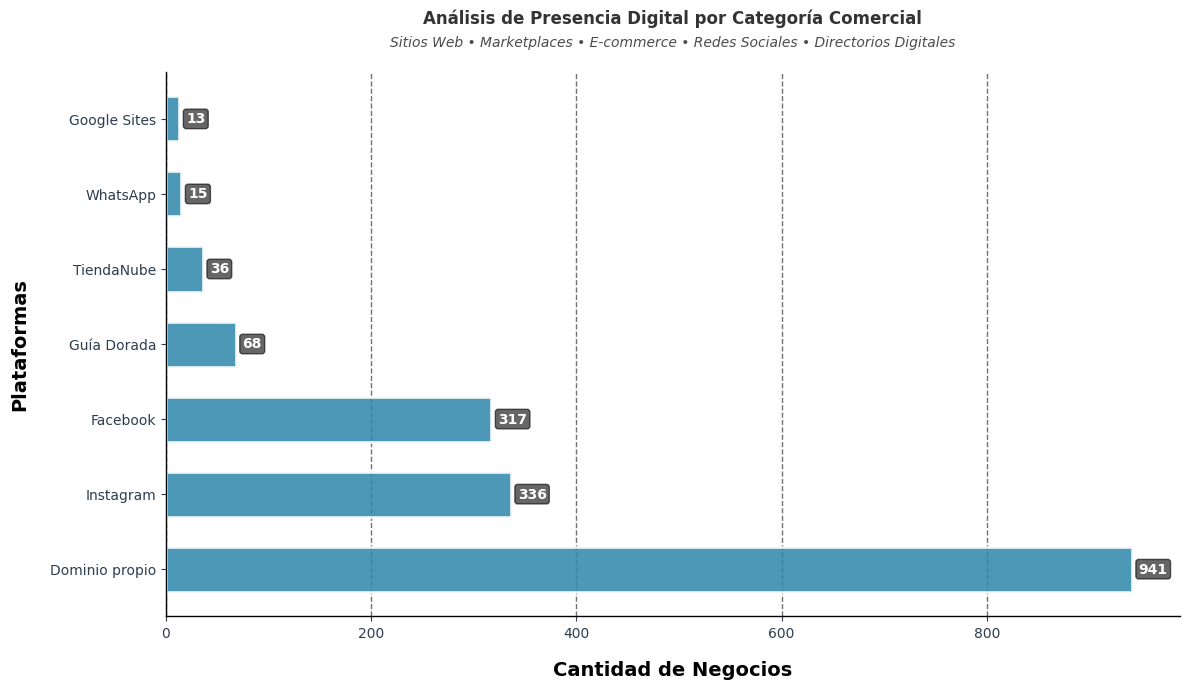

In [22]:
# Filtrado de datos para análisis enfocado
# Solo categorías con más de 10 negocios para mayor relevancia estadística
result_df_filtered = result_df[result_df["count"] > 10]

# Resumen del dataset filtrado
print("📋 RESUMEN DEL ANÁLISIS")
print(f"🔹 Total de categorías: {len(result_df)}")
print(f"🔹 Categorías mostradas (con cantidades mayores a 10): {len(result_df_filtered)}")
print(f"🔹 Rango de valores mostrados: {result_df_filtered['count'].min()} - {result_df_filtered['count'].max()} negocios")
print(f"🔹 Categoría líder: {result_df_filtered.index[0]} ({result_df_filtered['count'].iloc[0]} negocios)")
print(f"🔹 Total negocios digitalizados analizados: {result_df_filtered['count'].sum()}")

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
color_principal = '#2E86AB'  # Color corporativo azul

# Crea gráfico de barras horizontales
# Formato horizontal facilita la lectura de nombres largos de categorías
bars = ax.barh(
    result_df_filtered.index,          # Categorías en eje Y
    result_df_filtered["count"],       # Valores en eje X
    color=color_principal,              
    edgecolor='white',                 # Bordes blancos para separación visual
    linewidth=2,                        
    alpha=0.85,                        # Transparencia para suavidad
    height=0.6                         # Altura optimizada para legibilidad
)

# Títulos informativos con jerarquía visual
ax.text(0.5, 1.08, 'Análisis de Presencia Digital por Categoría Comercial', 
        transform=ax.transAxes,      
        fontsize=12, 
        ha='center',                  
        va='bottom',                   
        fontweight='bold',
        alpha=0.8)

# Subtítulo descriptivo de las plataformas incluidas
ax.text(0.5, 1.04, 'Sitios Web • Marketplaces • E-commerce • Redes Sociales • Directorios Digitales', 
        transform=ax.transAxes,      
        fontsize=10, 
        ha='center',                  
        va='bottom',                   
        alpha=0.7,
        style='italic')       

# Etiquetas de valores en cada barra
# Con fondo contrastante para mejor legibilidad
for bar in bars:
    width = bar.get_width()             
    
    ax.annotate(f'{int(width)}',        # Mostrar valor entero
                xy=(width, bar.get_y() + bar.get_height()/2), 
                xytext=(5, 0),          # Offset de 5px desde el final de la barra
                textcoords="offset points",
                ha='left',
                va='center', 
                fontweight='bold',
                fontsize=10,
                color='white',          # Texto blanco sobre fondo oscuro
                bbox=dict(              # Fondo redondeado para destacar
                    boxstyle="round,pad=0.2",
                    facecolor='black', 
                    alpha=0.6
                ))

# Personalización de ejes con etiquetas descriptivas
ax.set_xlabel("Cantidad de Negocios", 
            fontsize=14, 
            fontweight='bold', 
            labelpad=15)             

ax.set_ylabel("Plataformas", 
            fontsize=14, 
            fontweight='bold', 
            labelpad=15)

# Grid horizontal para facilitar lectura de valores
ax.xaxis.grid(True,                     
            linestyle='--',             # Líneas punteadas discretas
            alpha=0.9,
            color="#646363",          # Gris medio para contraste
            linewidth=1)
ax.set_axisbelow(True)                  # Grid por debajo de los datos

# Limpieza visual eliminando bordes innecesarios
ax.spines['top'].set_visible(False)     # Sin borde superior
ax.spines['right'].set_visible(False)   # Sin borde derecho
ax.spines['left'].set_linewidth(1)      
ax.spines['bottom'].set_linewidth(1) 

# Mejora apariencia de etiquetas de ejes
ax.tick_params(axis='both',
            which='major',
            labelsize=10,              # Tamaño legible
            colors='#2C3E50')        # Color corporativo consistente

plt.tight_layout()  # Ajuste automático de espaciado
plt.show()

In [23]:
# Calcular métricas base por ciudad
total_registros = df.groupby('city').size()
registros_incomplete = df[df['website'].str.contains('Incomplete', case=False, na=False)].groupby('city').size()

# Crear tabla resumen
resumen = pd.DataFrame({
    'total_registros': total_registros,
    'Incomplete': registros_incomplete
}).fillna(0)

# Calcular métricas derivadas
resumen['complete'] = resumen['total_registros'] - resumen['Incomplete']
resumen['complete_pct'] = (resumen['complete'] / resumen['total_registros'] * 100).round(2)
resumen['Incomplete_pct'] = (resumen['Incomplete'] / resumen['total_registros'] * 100).round(2)

# Ordenar por total de registros
resumen = resumen.sort_values('total_registros', ascending=False)
resumen

,total_registros,Incomplete,complete,complete_pct,Incomplete_pct
city,,,,,
Tandil,2409,1560,849,35.24,64.76
Olavarría,1494,997,497,33.27,66.73
Azul,1274,992,282,22.14,77.86
Benito Juárez,351,289,62,17.66,82.34
Rauch,331,271,60,18.13,81.87


In [24]:
# Promedio general de presencia web
avg_General = resumen['complete_pct'].mean().round(2)
print(f"Promedio general de presencia web: {avg_General}%")

Promedio general de presencia web: 25.29%


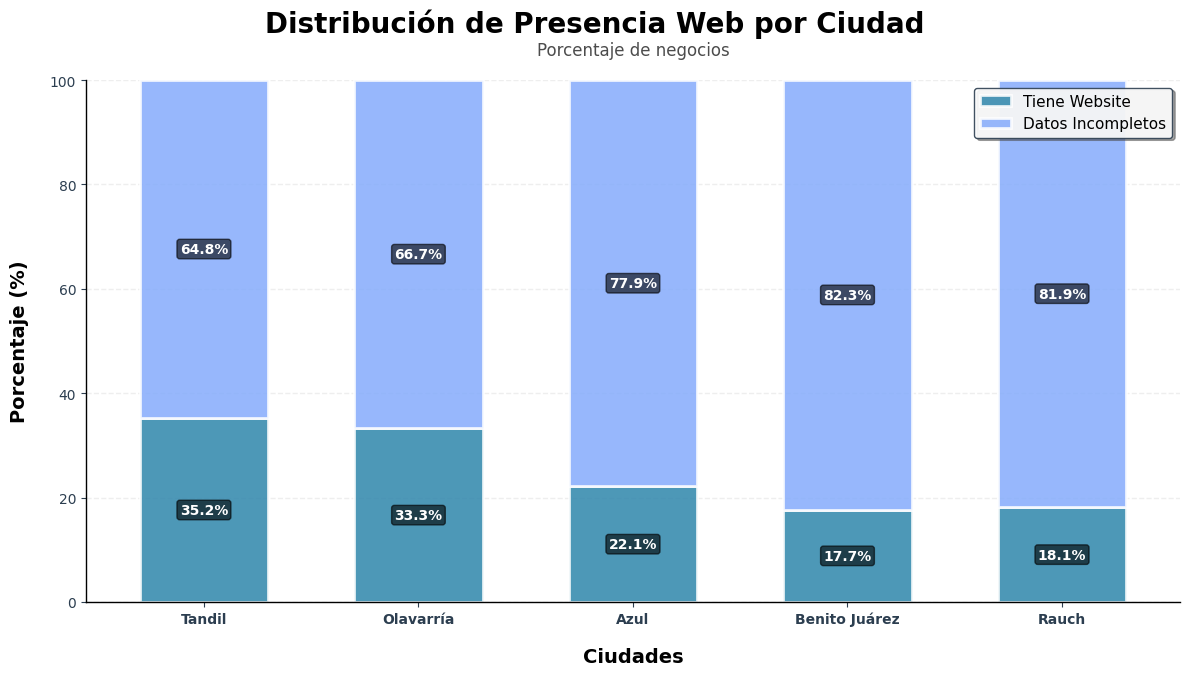

In [25]:
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

colors = ['#2E86AB', "#85abfc"] 

bars = resumen[['complete_pct', 'Incomplete_pct']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=colors,
    width=0.6,
    edgecolor='white',
    linewidth=2,
    alpha=0.85
)

fig.suptitle('Distribución de Presencia Web por Ciudad', 
            fontsize=20, fontweight='bold', y=0.96)

ax.text(0.5, 1.04, 'Porcentaje de negocios', 
        transform=ax.transAxes, fontsize=12, 
        ha='center', va='bottom', alpha=0.7)

# Etiquetas de porcentaje mejoradas
for i, container in enumerate(ax.containers):
    labels = [f'{w:.1f}%' if w > 5 else '' for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', 
                color='white', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))

ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Ciudades', fontsize=14, fontweight='bold', labelpad=15)

ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='#E8E8E8', linewidth=1)
ax.set_axisbelow(True)

ax.legend(['Tiene Website', 'Datos Incompletos'], 
        loc='upper right', frameon=True, shadow=True, 
        fancybox=True, fontsize=11, 
        facecolor='white', edgecolor='#2C3E50', framealpha=0.9)

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))


plt.xticks(
    rotation=45 if len(resumen) > 8 else 0, 
    ha='right' if len(resumen) > 8 else 'center',
    fontweight='bold', fontsize=10, color='#2C3E50'
)

# Limpiar bordes 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Mejorar los ticks
ax.tick_params(axis='both', which='major', labelsize=10, colors='#2C3E50')

plt.tight_layout()
plt.show()

In [26]:
# Agrupar por ciudad y categoría
category_counts = (
    df
    .groupby(['categoryName'])
    .size()
    .reset_index(name='website_count')
)
category_counts = category_counts.sort_values(by='website_count', ascending=False)
category_counts

,categoryName,website_count
573,Tienda De Ropa,465
444,Tienda De Alimentación,366
90,Comercio,334
14,Agencia Inmobiliaria,180
230,Incomplete,142
...,...,...
7,Agencia De Publicidad,1
617,Wood Supplier,1
618,Zapatero,1
3,Agencia De Alquiler De Grúas,1


In [27]:
# Muestra cuántas veces aparece cada puntaje total en el dataset, ordenado descendentemente
df['totalScore'].value_counts().sort_values(ascending=False)

totalScore
0.0    1397
5.0    1205
4.5     424
4.7     400
4.6     400
4.8     374
4.4     315
4.3     267
4.9     215
4.0     198
4.2     149
4.1     115
3.0      70
3.8      61
3.7      57
1.0      38
3.9      38
3.5      25
2.0      21
3.6      20
3.3      18
3.4      13
2.3      11
2.5       5
3.1       4
2.7       3
1.9       2
3.2       2
1.8       2
2.9       2
2.8       2
1.5       1
2.4       1
1.3       1
1.7       1
2.6       1
2.1       1
Name: count, dtype: int64